# Car Accidents Italy

Notebook for data analysis for car accidents in Italy.

**note** 
- Il dataset che avevamo trovato era delle _tabelle_, ovvero dei dati già analizzati. Si mostra quindi con dei metadati.
- Il dataset è troppo pesante per GitHub. È stato quindi messo in `.gitignore`.

**cose da fare**
- Calcolare indici di eterogeneità di Gini
- Controllare se sotto Natale ci sono più incidenti
- Dimostrare che le donne **non** sono più pericolose al volante degli uomini



In [1]:
dataset_proj <- read.csv("dataset/dataset progetto.csv", sep=';')

In [2]:
dataset_proj

anno,provincia,comune,giorno,organo_di_rilevazione,localizzazione_incidente,denominazione_della_strada,tronco_di_strada_o_autostrada,tipo_di_strada,pavimentazione,...,feriti_maschi_coinvolti_su97,feriti_femmine_coinvolti_s98,morti_entro_24_ore,morti_entro_30_giorni,feriti,descrizione_strada,Ora,chilometri,ettometrica,trimestre
17,7,30,6,2,6,27,12,2,1,...,0,0,0,0,6,NA,6,12,900,2
17,7,66,1,2,3,26,12,2,1,...,0,0,0,0,1,NA,13,0,0,3
17,7,43,3,2,6,26,12,2,1,...,0,0,0,0,1,NA,15,69,100,4
17,7,24,1,2,8,0,12,2,1,...,0,0,0,0,1,NA,17,0,0,4
17,7,65,1,2,1,0,12,2,1,...,0,0,0,0,1,NA,10,0,0,4
17,7,73,7,2,6,26,12,2,1,...,0,0,0,0,2,NA,19,0,0,3
17,7,3,5,2,1,0,12,2,1,...,0,0,0,0,1,NA,15,0,0,1
17,7,65,4,2,1,0,12,2,1,...,0,0,0,0,1,NA,20,0,0,2
17,7,3,5,2,1,0,12,1,1,...,0,0,0,0,1,NA,16,0,0,2
17,7,58,1,2,6,26,12,2,1,...,0,0,0,0,1,NA,10,98,400,2


In [3]:
cat("Grandezza del dataset:",ncol(dataset_proj),"x",nrow(dataset_proj))

Grandezza del dataset: 117 x 174933

Andiamo a prendere un campione di dal dataset che viene fornito. Per modificare la grandezza del campione, si cambi `SAMPLE_SIZE`.

In [4]:
SAMPLE_SIZE = 20000

In [5]:
sample_rows <- sample(nrow(dataset_proj), SAMPLE_SIZE)

In [6]:
sample_data = dataset_proj[sample_rows,]

In [7]:
names(sample_data)

[1] "anno"                          "provincia"                    
  [3] "comune"                        "giorno"                       
  [5] "organo_di_rilevazione"         "localizzazione_incidente"     
  [7] "denominazione_della_strada"    "tronco_di_strada_o_autostrada"
  [9] "tipo_di_strada"                "pavimentazione"               
 [11] "intersezione_o_non_interse3"   "fondo_stradale"               
 [13] "segnaletica"                   "condizioni_meteorologiche"    
 [15] "natura_incidente"              "tipo_veicolo_a"               
 [17] "tipo_veicoli__b_"              "tipo_veicolo__c_"             
 [19] "veicolo__a____circostanze_10"  "veicolo__a____circostanze_11" 
 [21] "veicolo__b____circostanze_13"  "veicolo__b____circostanze_14" 
 [23] "veicolo__a___anno_immatric18"  "immatricolazione_veicolo__b_" 
 [25] "immatricolazione_veicolo__c_"  "veicolo__a___et__conducente"  
 [27] "veicolo__a___sesso_conducente" "veicolo__a___esito_conducente"
 [29] "veicolo__a___patente_condu29"  "veicolo__a___anno_rilascio30" 
 [31] "veicolo__a___passeggeri_an35"  "veicolo__a___et__passegger36" 
 [33] "veicolo__a___sesso_passegg37"  "veicolo__a___esito_passegg38" 
 [35] "veicolo__a___et__passegger39"  "veicolo__a___sesso_passegg40" 
 [37] "veicolo__a___esito_passegg41"  "veicolo__a___et__passegger42" 
 [39] "veicolo__a___sesso_passegg43"  "veicolo__a___esito_passegg44" 
 [41] "veicolo__a___et__passegger45"  "veicolo__a___sesso_passegg46" 
 [43] "veicolo__a___altri_passegg47"  "veicolo__a___altri_passegg48" 
 [45] "veicolo__a___altri_passegg49"  "veicolo__a___altri_passegg50" 
 [47] "veicolo__b___et__conducente"   "veicolo__b___sesso_conducente"
 [49] "veicolo__b___esito_conducente" "veicolo__b___patente_condu51" 
 [51] "veicolo__b___anno_rilascio52"  "veicolo__b___passeggeri_an57" 
 [53] "veicolo__b___et__passegger58"  "veicolo__b___sesso_passegg59" 
 [55] "veicolo__b___esito_passegg60"  "veicolo__b___et__passegger61" 
 [57] "veicolo__b___sesso_passegg62"  "veicolo__b___esito_passegg63" 
 [59] "veicolo__b___et__passegger64"  "veicolo__b___sesso_passegg65" 
 [61] "veicolo__b___esito_passegg66"  "veicolo__b___et__passegger67" 
 [63] "veicolo__b___sesso_passegg68"  "veicolo__b___altri_passegg69" 
 [65] "veicolo__b___altri_passegg70"  "veicolo__b___altri_passegg71" 
 [67] "veicolo__b___altri_passegg72"  "veicolo__c___et__conducente"  
 [69] "veicolo__c___sesso_conducente" "veicolo__c___esito_conducente"
 [71] "veicolo__c___patente_condu73"  "veicolo__c___anno_rilascio74" 
 [73] "veicolo__c___passeggeri_an79"  "veicolo__c___et__passegger80" 
 [75] "veicolo__c___sesso_passegg81"  "veicolo__c___esito_passegg82" 
 [77] "veicolo__c___et__passegger83"  "veicolo__c___sesso_passegg84" 
 [79] "veicolo__c___esito_passegg85"  "veicolo__c___et__passegger86" 
 [81] "veicolo__c___sesso_passegg87"  "veicolo__c___esito_passegg88" 
 [83] "veicolo__c___et__passegger89"  "veicolo__c___sesso_passegg90" 
 [85] "veicolo__c___altri_passegg91"  "veicolo__c___altri_passegg92" 
 [87] "veicolo__c___altri_passegg93"  "veicolo__c___altri_passegg94" 
 [89] "pedone_morto_1__sesso"         "pedone_morto_1__et_"          
 [91] "pedone_ferito_1__sesso"        "pedone_ferito_1__et_"         
 [93] "pedone_morto_2__sesso"         "pedone_morto_2__et_"          
 [95] "pedone_ferito_2__sesso"        "pedone_ferito_2__et_"         
 [97] "pedone_morto_3__sesso"         "pedone_morto_3__et_"          
 [99] "pedone_ferito_3__sesso"        "pedone_ferito_3__et_"         
[101] "pedone_morto_4__sesso"         "pedone_morto_4__et_"          
[103] "pedone_ferito_4__sesso"        "pedone_ferito_4__et_"         
[105] "altri_veicoli_coinvolti"       "morti_maschi_coinvolti_su_95" 
[107] "morti_femmine_coinvolti_su96"  "feriti_maschi_coinvolti_su97" 
[109] "feriti_femmine_coinvolti_s98"  "morti_entro_24_ore"           
[111] "morti_entro_30_giorni"         "feriti"                       
[113] "descrizione_strada"            "Ora"                          
[115] "chilo

In [8]:
attach(sample_data)

In [31]:
giorno <- factor(giorno)
levels(giorno) <- c("Lun", "Mar", "Mer", "Gio", "Ven", "Sab", "Dom")
incidenti_per_giorni = table(giorno)

In [32]:
levels(giorno)

[1] "Lun" "Mar" "Mer" "Gio" "Ven" "Sab" "Dom"

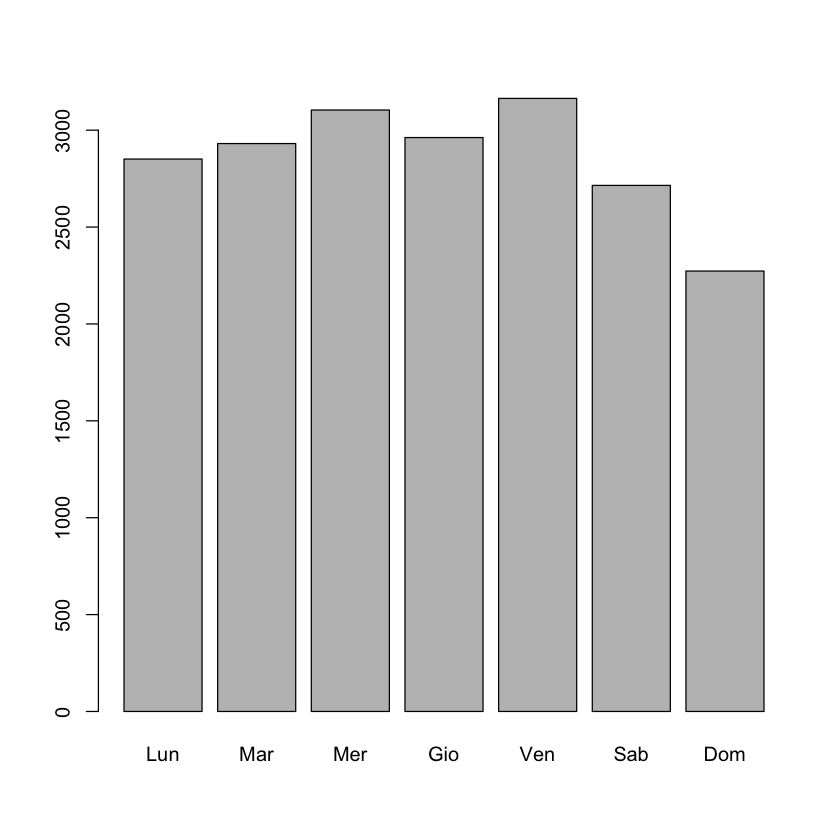

In [36]:
barplot(incidenti_per_giorni)

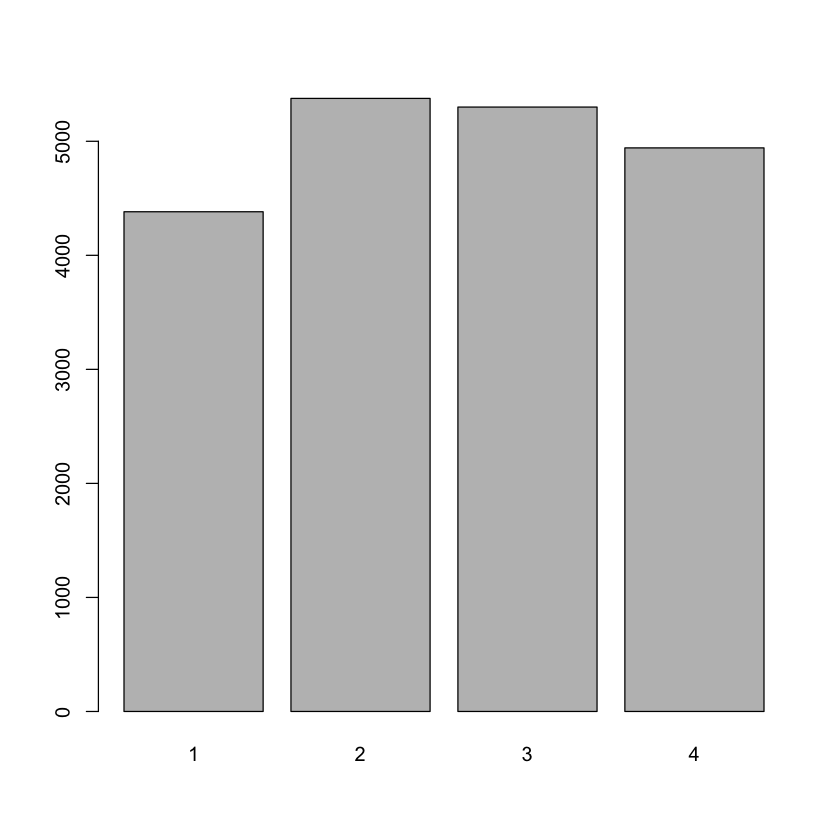

In [37]:
barplot(table(trimestre))